In [1]:
from helpers import *
import os
print(os.getcwd())
import time

/home/workspace/2022.micro.artifact/experiments-matmul2


In [2]:
verbose = True
architecture = "/home/workspace/2022.micro.artifact/experiments-matmul2/arch.yaml"
architecture2 = "/home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml"
component = "/home/workspace/2022.micro.artifact/experiments-matmul2/compound_components.yaml"
ERT_output_path = "ERT.yaml"
ART_output_path = "ART.yaml"
sparse_opts = "/home/workspace/2022.micro.artifact/experiments-matmul2/SI-SW.yaml"
workload = "/home/workspace/2022.micro.artifact/experiments-matmul2/matmul.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml"
mapping = "/home/workspace/2022.micro.artifact/experiments-matmul2/timeloop_temp/timeloop-mapper.map.yaml"
constraints = "/home/workspace/2022.micro.artifact/experiments-matmul2/constraints.yaml"

In [3]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/loca

In [4]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]
print(mapping_path)

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/matmul.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper 

[  1] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.006 | pJ/Compute = 156620.614 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  0] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.006 | pJ/Compute = 156620.614 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  0] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.006 | pJ/Compute = 156223.354 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[O] N1 
[  1] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.006 | pJ/Compute = 156154.109 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[O] N1 
[  2] Utilization = 0.21 | pJ/Algorithmic-Compute =    0.006 | pJ/Compute = 156620.009 | L4[] N256 M32 M4X - L3[I] M8 N16 - L2[W] M8 - L1[O] N4 - L0[] M2 
[  3] Utilization = 0.21 | pJ/Algorithmic-Compute =    0.006 | pJ/Compute = 156620.009 | L4[] M32 N256 M4X - L3[I] N16 M8 - L2[W] M8 - L1[O] N4 M2 - L0[] N1 
[  2] Utilization = 0.21 | pJ/Algorithmic-Compute =    0.00



Summary stats for best mapping found by mapper:
  Utilization = 0.31 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 25521.511


KeyboardInterrupt: 

In [5]:
# If you already have mapping
mapping_path = "searched_mapping.yaml"

output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/matmul.yaml searched_mapping.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.1746819019317627
Timeloop completed successfully.


dict_keys(['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage'])
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


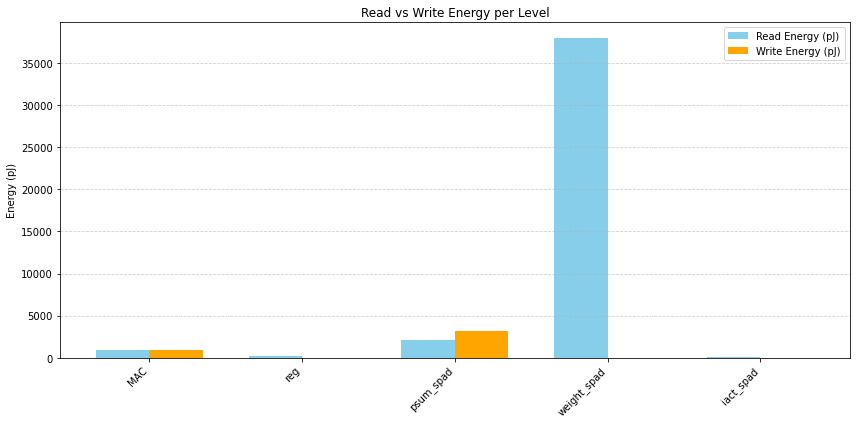

In [6]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
print(output['energy_breakdown_pJ'].keys())
plot_read_write_energy(output["energy_breakdown_pJ"])

['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


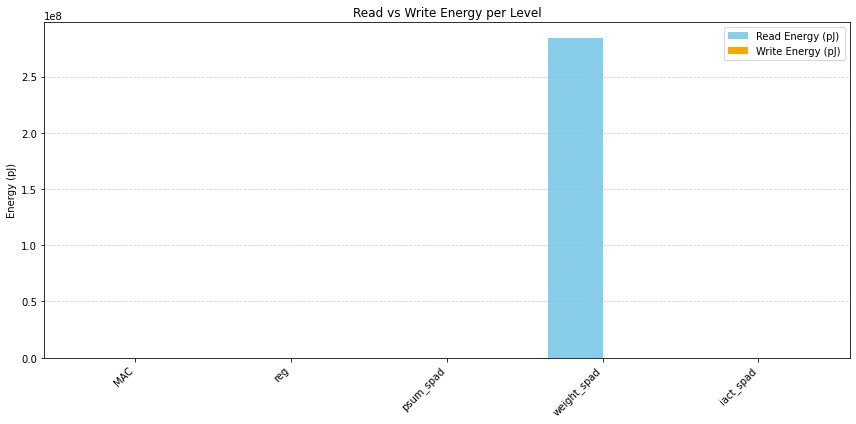

In [7]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])

In [ ]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

In [ ]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]

In [ ]:
# If you already have mapping
# mapping_path = "/home/workspace/2022.micro.artifact/experiments-maggie/custom_mapping.yaml"
output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

In [ ]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])